Users Shape: (3000, 5)
Courses Shape: (60, 8)
Transactions Shape: (10000, 7)

Missing Values:
Users:
 UserID      0
UserName    0
Age         0
Gender      0
Email       0
dtype: int64
Courses:
 CourseID          0
CourseName        0
CourseCategory    0
CourseType        0
CourseLevel       0
CoursePrice       0
CourseDuration    0
CourseRating      0
dtype: int64
Transactions:
 TransactionID      0
UserID             0
CourseID           0
TransactionDate    0
Amount             0
PaymentMethod      0
TeacherID          0
dtype: int64

Duplicate IDs:
Duplicate UserIDs: 0
Duplicate CourseIDs: 0
Duplicate TransactionIDs: 0

Merged Data Shape: (10000, 18)

Total Enrollments: 10000

Age Statistics:
count    10000.000000
mean        24.965700
std          6.051858
min         15.000000
25%         20.000000
50%         25.000000
75%         30.000000
max         35.000000
Name: Age, dtype: float64

Age Group Distribution (Count):
AgeGroup
26-35    4799
18-25    3732
<18      1469
36-45   

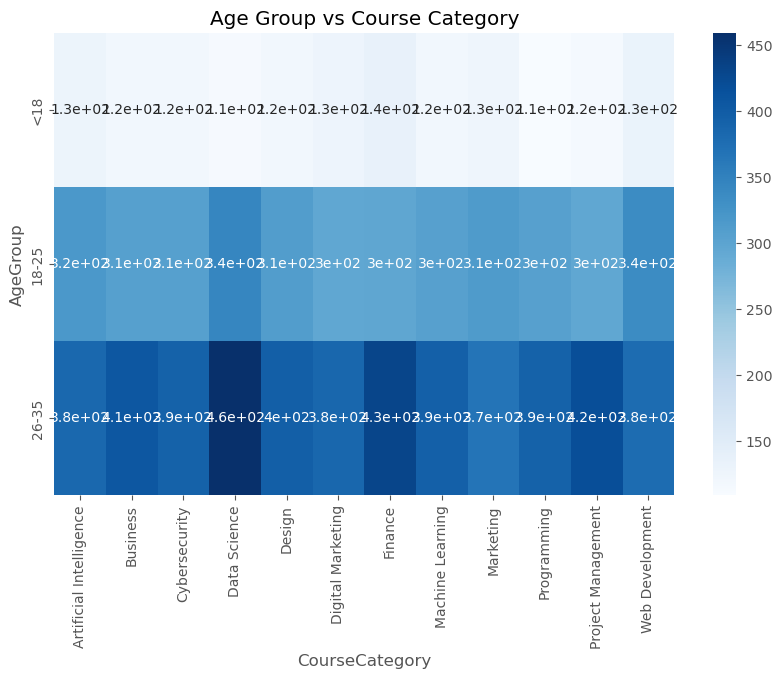

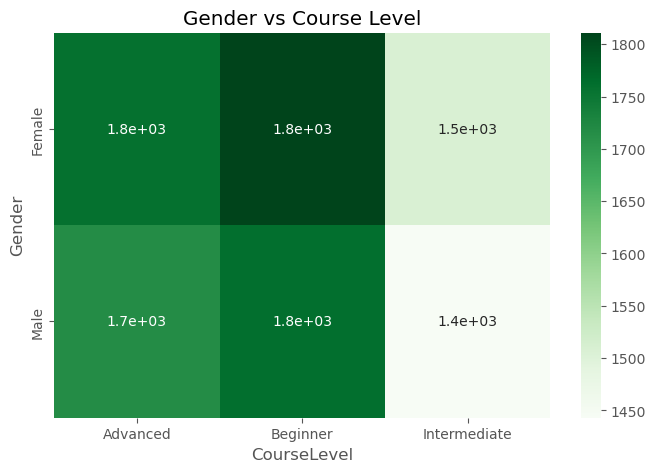


Beginner Enrollments by Age Group (%):
AgeGroup
26-35    48.33
18-25    37.64
<18      14.02
36-45     0.00
45+       0.00
Name: proportion, dtype: float64

Beginner Enrollments by Gender (%):
Gender
Female    50.69
Male      49.31
Name: proportion, dtype: float64

Average Courses Per Learner: 3.33

Courses Per User Summary:
count    3000.000000
mean        3.333333
std         4.352149
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max        16.000000
dtype: float64

Learner Segmentation:
Single Course       1620
Moderate Learner     798
Power Learner        582
Name: count, dtype: int64


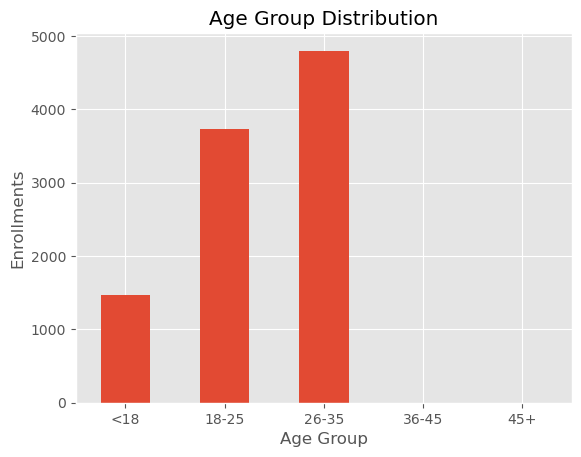

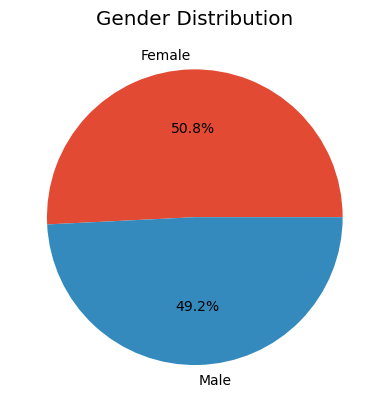

AgeGroup
26-35    47.99
18-25    37.32
<18      14.69
36-45     0.00
45+       0.00
Name: proportion, dtype: float64
Gender
Female    50.78
Male      49.22
Name: proportion, dtype: float64
AgeGroup
26-35    48.334733
18-25    37.643437
<18      14.021830
36-45     0.000000
45+       0.000000
Name: proportion, dtype: float64


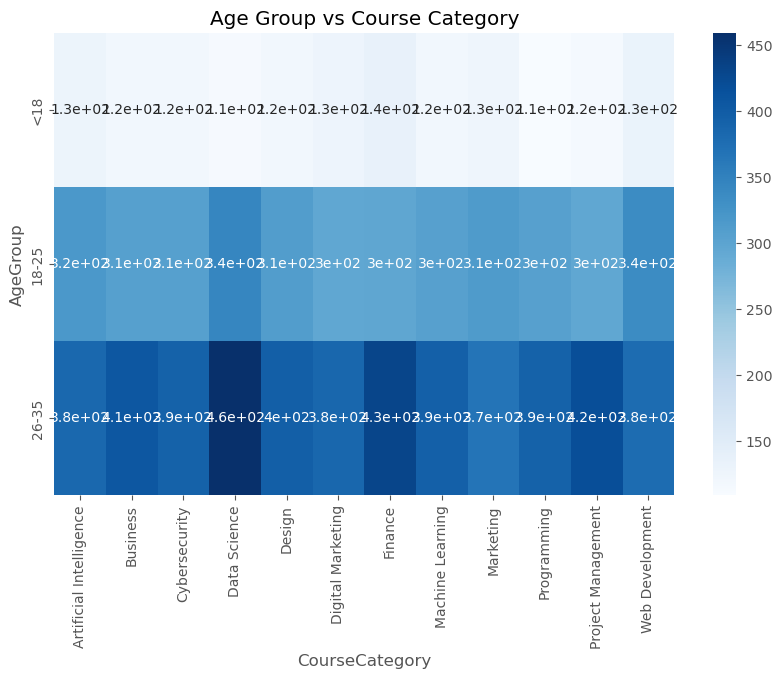

In [4]:
# EduPro Learner Demographics & Course Enrollment Analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

# Load Dataset
file = "data/EduPro Online Platform.xlsx"

users = pd.read_excel(file, sheet_name="Users")
courses = pd.read_excel(file, sheet_name="Courses")
transactions = pd.read_excel(file, sheet_name="Transactions")

print("Users Shape:", users.shape)
print("Courses Shape:", courses.shape)
print("Transactions Shape:", transactions.shape)


# Data Quality Checks
print("\nMissing Values:")
print("Users:\n", users.isnull().sum())
print("Courses:\n", courses.isnull().sum())
print("Transactions:\n", transactions.isnull().sum())

print("\nDuplicate IDs:")
print("Duplicate UserIDs:", users["UserID"].duplicated().sum())
print("Duplicate CourseIDs:", courses["CourseID"].duplicated().sum())
print("Duplicate TransactionIDs:", transactions["TransactionID"].duplicated().sum())


# Merge Datasets
merged_data = transactions.merge(users, on="UserID", how="inner") \
                          .merge(courses, on="CourseID", how="inner")

print("\nMerged Data Shape:", merged_data.shape)


# Create Age Groups
bins = [0, 17, 25, 35, 45, 100]
labels = ["<18", "18-25", "26-35", "36-45", "45+"]

merged_data["AgeGroup"] = pd.cut(merged_data["Age"], bins=bins, labels=labels)


# Total Enrollments
total_enrollments = merged_data.shape[0]
print("\nTotal Enrollments:", total_enrollments)


# Age Analysis
print("\nAge Statistics:")
print(merged_data["Age"].describe())

print("\nAge Group Distribution (Count):")
print(merged_data["AgeGroup"].value_counts())

print("\nAge Group Distribution (%):")
age_percent = merged_data["AgeGroup"].value_counts(normalize=True) * 100
print(age_percent.round(2))


# Gender Analysis
print("\nGender Distribution (Count):")
print(merged_data["Gender"].value_counts())

print("\nGender Distribution (%):")
gender_percent = merged_data["Gender"].value_counts(normalize=True) * 100
print(gender_percent.round(2))


# Course Popularity
print("\nCourse Category Distribution:")
print(merged_data["CourseCategory"].value_counts())

print("\nCourse Level Distribution:")
print(merged_data["CourseLevel"].value_counts())

print("\nCourse Type Distribution:")
print(merged_data["CourseType"].value_counts())


# Age Group vs Course Category Heatmap
age_category = pd.crosstab(merged_data["AgeGroup"],
                           merged_data["CourseCategory"])

plt.figure(figsize=(10,6))
sns.heatmap(age_category, annot=True, cmap="Blues")
plt.title("Age Group vs Course Category")
plt.show()


# Gender vs Course Level Heatmap
gender_level = pd.crosstab(merged_data["Gender"],
                           merged_data["CourseLevel"])

plt.figure(figsize=(8,5))
sns.heatmap(gender_level, annot=True, cmap="Greens")
plt.title("Gender vs Course Level")
plt.show()


# Beginner Behavior Analysis
beginner_data = merged_data[merged_data["CourseLevel"] == "Beginner"]

print("\nBeginner Enrollments by Age Group (%):")
beginner_by_age = beginner_data["AgeGroup"].value_counts(normalize=True) * 100
print(beginner_by_age.round(2))

print("\nBeginner Enrollments by Gender (%):")
beginner_by_gender = beginner_data["Gender"].value_counts(normalize=True) * 100
print(beginner_by_gender.round(2))


# Behavioral Insights
avg_courses = merged_data.groupby("UserID").size().mean()
print("\nAverage Courses Per Learner:", round(avg_courses, 2))

courses_per_user = merged_data.groupby("UserID").size()

print("\nCourses Per User Summary:")
print(courses_per_user.describe())


# Learner Segmentation
def segment(x):
    if x == 1:
        return "Single Course"
    elif x <= 3:
        return "Moderate Learner"
    else:
        return "Power Learner"

user_segments = courses_per_user.apply(segment)

print("\nLearner Segmentation:")
print(user_segments.value_counts())


# Visualizations

merged_data["AgeGroup"].value_counts().sort_index().plot(kind="bar")
plt.title("Age Group Distribution")
plt.xlabel("Age Group")
plt.ylabel("Enrollments")
plt.xticks(rotation=0)
plt.show()


gender_counts = merged_data["Gender"].value_counts()

plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title("Gender Distribution")
plt.show()

age_percent = merged_data["AgeGroup"].value_counts(normalize=True) * 100
gender_percent = merged_data["Gender"].value_counts(normalize=True) * 100

print(age_percent.round(2))
print(gender_percent.round(2))

beginner_data = merged_data[merged_data["CourseLevel"] == "Beginner"]

print(beginner_data["AgeGroup"].value_counts(normalize=True) * 100)

heatmap_data = pd.crosstab(merged_data["AgeGroup"], merged_data["CourseCategory"])
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, cmap="Blues")
plt.title("Age Group vs Course Category")
plt.show()